In [1105]:
import json
import pandas as pd
import matplotlib.pyplot as plt


def read_json_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            json_obj = json.loads(line)
            data.append(json_obj)
    return data

In [1106]:
json_path = "/cluster/scratch/mullec/FoRL/FRL23-project/dreamerv3/logdir/00_PD_NOISE_01_150k__FIXED/metrics.jsonl"

metrics = read_json_file(json_path)

metrics_df = pd.json_normalize(metrics)

# # Print the DataFrame
# for col in metrics_df.columns:
#     print(col)

In [1107]:
cost_per_observation = 0.4
VERTICAL_LINE = 150000
FROM = VERTICAL_LINE - 3000
UNTIL = VERTICAL_LINE + 5000

metrics_df["eval/diff_reward_avg"] = metrics_df["eval/reward_avg"] - metrics_df["eval/reward_pred"]
metrics_df["eval/diff_reward_avg_abs"] = metrics_df["eval/diff_reward_avg"].abs()

metrics_df["episode/scaled_score"] = metrics_df["episode/score"] - metrics_df["episode/length"] * cost_per_observation

print(metrics_df["step"].max())

223000


# SCORE OF EPISODE

/tmp/ipykernel_25647/982347271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


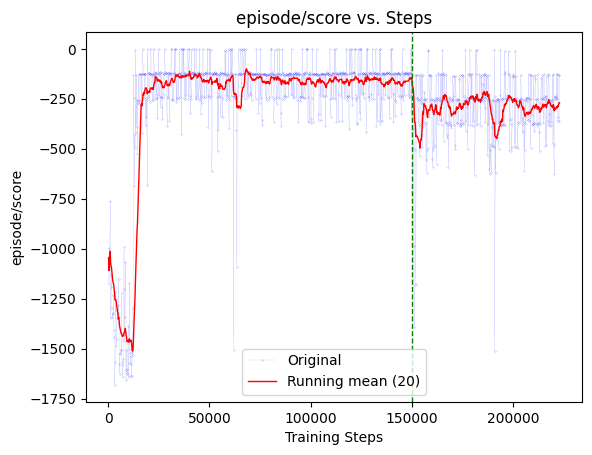

In [1108]:
METRIC = "episode/score"
ROLLING_WINDOW = 20


metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Calculate the moving average using a window size of 10
metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_no_na['step'], metrics_df_no_na[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(metrics_df_no_na['step'], metrics_df_no_na['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axvline(x=VERTICAL_LINE, color='g', linestyle='--', linewidth=1)
plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
plt.show()


/tmp/ipykernel_25647/2140811844.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


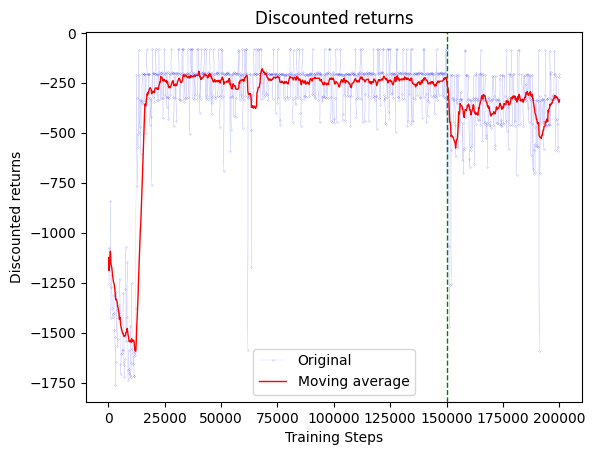

In [1109]:
METRIC = "episode/scaled_score"
ROLLING_WINDOW = 20
FROM = 0
UNTIL = 200000

metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Filter the DataFrame for Step > 149000 and Step < 155000
filtered_df = metrics_df_no_na[(metrics_df_no_na['step'] > FROM) & (metrics_df_no_na['step'] < UNTIL)]

# Calculate the moving average using a window size of 10
filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(filtered_df['step'], filtered_df[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(filtered_df['step'], filtered_df['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axvline(x=VERTICAL_LINE, color='g', linestyle='--', linewidth=1)

plt.xlabel('Training Steps')
plt.ylabel("Discounted returns")
plt.title("Discounted returns")
plt.legend(['Original', "Moving average"])
plt.show()

/tmp/ipykernel_25647/1316363533.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


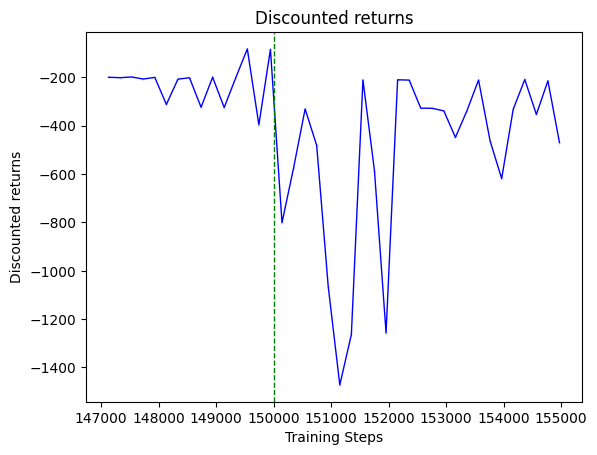

In [1110]:
METRIC = "episode/scaled_score"
ROLLING_WINDOW = 1
FROM = 147000
UNTIL = 155000

metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Filter the DataFrame for Step > 149000 and Step < 155000
filtered_df = metrics_df_no_na[(metrics_df_no_na['step'] > FROM) & (metrics_df_no_na['step'] < UNTIL)]

# Calculate the moving average using a window size of 10
filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(filtered_df['step'], filtered_df[METRIC], marker='o', linestyle='-', color='b', linewidth=1, markersize=0.1)
# plt.plot(filtered_df['step'], filtered_df['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axvline(x=VERTICAL_LINE, color='g', linestyle='--', linewidth=1)

plt.xlabel('Training Steps')
plt.ylabel("Discounted returns")
plt.title("Discounted returns")
plt.show()


# PRIOR ENTROPY

/tmp/ipykernel_25647/2472466289.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


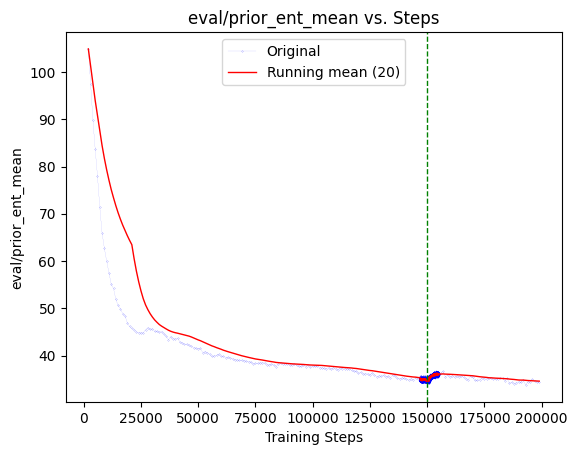

In [1111]:
METRIC = "eval/prior_ent_mean"
FROM = 0
UNTIL = 200000
ROLLING_WINDOW = 20

metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Filter the DataFrame for step > 1000
metrics_df_filtered = metrics_df_no_na[(metrics_df_no_na['step'] > FROM) & (metrics_df_no_na['step'] < UNTIL)]

# Calculate the moving average using a window size of 10
metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_filtered['step'], metrics_df_filtered[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(metrics_df_filtered['step'], metrics_df_filtered['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axvline(x=VERTICAL_LINE, color='g', linestyle='--', linewidth=1)
plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
plt.show()


/tmp/ipykernel_25647/52551501.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


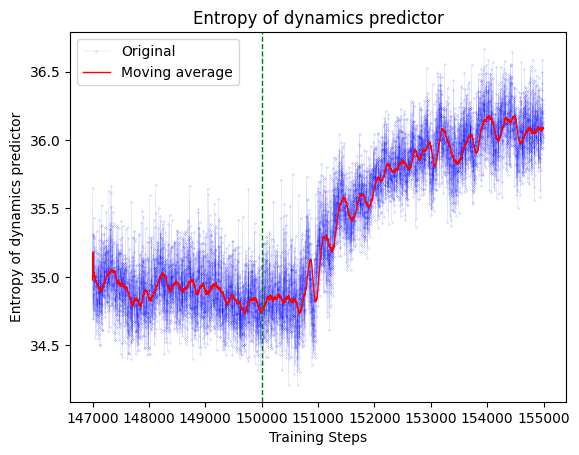

In [1124]:
METRIC = "eval/prior_ent_mean"
FROM = 147000
UNTIL = 155000
ROLLING_WINDOW = 100

metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Filter the DataFrame for step > 1000
metrics_df_filtered = metrics_df_no_na[(metrics_df_no_na['step'] > FROM) & (metrics_df_no_na['step'] < UNTIL)]

# Calculate the moving average using a window size of 10
metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_filtered['step'], metrics_df_filtered[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(metrics_df_filtered['step'], metrics_df_filtered['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axvline(x=VERTICAL_LINE, color='g', linestyle='--', linewidth=1)
plt.xlabel('Training Steps')
plt.ylabel("Entropy of dynamics predictor")
plt.title("Entropy of dynamics predictor")
plt.legend(['Original', "Moving average"])
plt.show()


# REWARD DIFFERENCE

/tmp/ipykernel_25647/193797922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


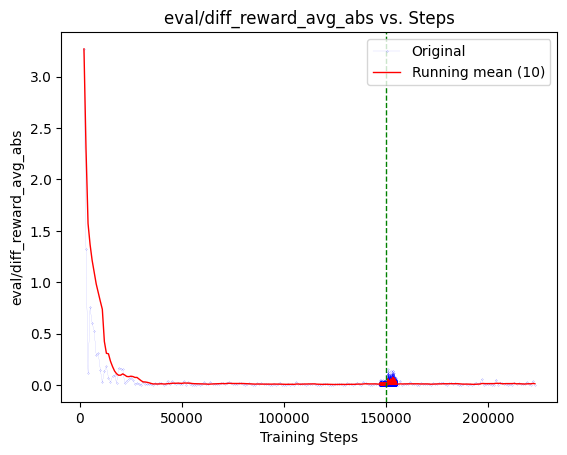

In [1113]:
METRIC = "eval/diff_reward_avg_abs"
ROLLING_WINDOW = 10


metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Calculate the moving average using a window size of 10
metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_no_na['step'], metrics_df_no_na[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(metrics_df_no_na['step'], metrics_df_no_na['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axvline(x=VERTICAL_LINE, color='g', linestyle='--', linewidth=1)

plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
plt.show()

/tmp/ipykernel_25647/1311408011.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


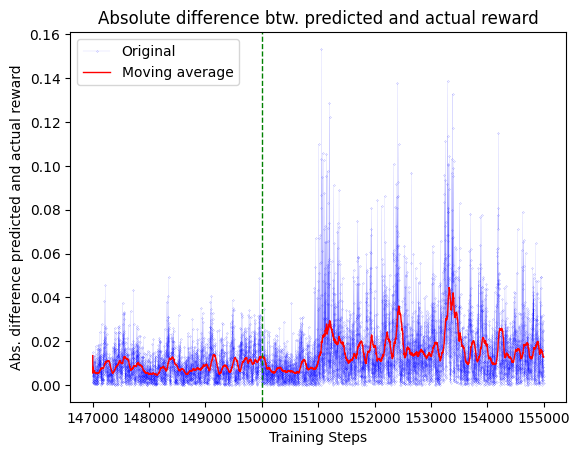

In [1127]:
METRIC = "eval/diff_reward_avg_abs"
FROM = 147000
UNTIL = 155000
ROLLING_WINDOW = 100

metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Filter the DataFrame for step > 1000
metrics_df_filtered = metrics_df_no_na[(metrics_df_no_na['step'] > FROM) & (metrics_df_no_na['step'] < UNTIL)]

# Calculate the moving average using a window size of 10
metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_filtered['step'], metrics_df_filtered[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(metrics_df_filtered['step'], metrics_df_filtered['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axvline(x=VERTICAL_LINE, color='g', linestyle='--', linewidth=1)
plt.xlabel('Training Steps')
plt.ylabel("Abs. difference predicted and actual rewards")
plt.title("Absolute difference btw. predicted and actual rewards")
plt.legend(['Original', "Moving average"])
plt.show()

# OTHER METRICS

In [1115]:
for col in metrics_df.columns:
    print(col)

step
episode/length
episode/score
episode/reward_rate
train/action_mag
train/action_max
train/action_mean
train/action_min
train/action_std
train/actor_opt_actor_opt_grad_overflow
train/actor_opt_actor_opt_grad_scale
train/actor_opt_grad_norm
train/actor_opt_grad_steps
train/actor_opt_loss
train/adv_mag
train/adv_max
train/adv_mean
train/adv_min
train/adv_std
train/cont_avg
train/cont_loss_mean
train/cont_loss_std
train/cont_neg_acc
train/cont_neg_loss
train/cont_pos_acc
train/cont_pos_loss
train/cont_pred
train/cont_rate
train/dyn_loss_mean
train/dyn_loss_std
train/extr_critic_critic_opt_critic_opt_grad_overflow
train/extr_critic_critic_opt_critic_opt_grad_scale
train/extr_critic_critic_opt_grad_norm
train/extr_critic_critic_opt_grad_steps
train/extr_critic_critic_opt_loss
train/extr_critic_mag
train/extr_critic_max
train/extr_critic_mean
train/extr_critic_min
train/extr_critic_std
train/extr_return_normed_mag
train/extr_return_normed_max
train/extr_return_normed_mean
train/extr_retur

/tmp/ipykernel_25647/3155417908.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


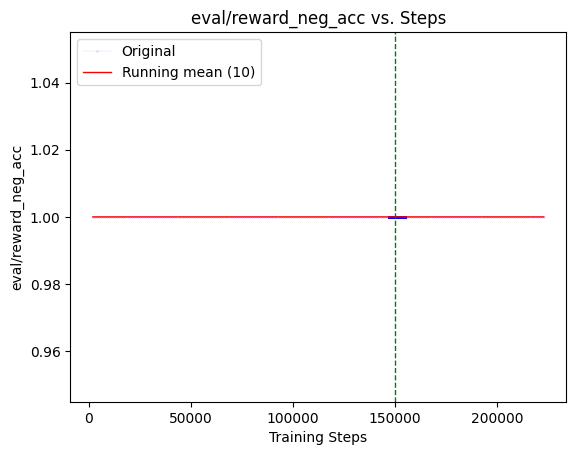

In [1116]:
METRIC = "eval/reward_neg_acc"
ROLLING_WINDOW = 10


metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Calculate the moving average using a window size of 10
metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_no_na['step'], metrics_df_no_na[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(metrics_df_no_na['step'], metrics_df_no_na['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axvline(x=150000, color='g', linestyle='--', linewidth=1)

plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
plt.show()

/tmp/ipykernel_25647/4227652681.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


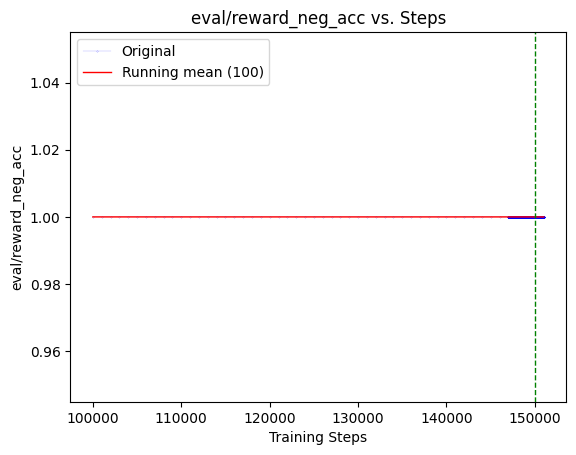

In [1117]:
METRIC = "eval/reward_neg_acc"
FROM = 99000
UNTIL = 151000
ROLLING_WINDOW = 100

metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

# Filter the DataFrame for step > 1000
metrics_df_filtered = metrics_df_no_na[(metrics_df_no_na['step'] > FROM) & (metrics_df_no_na['step'] < UNTIL)]

# Calculate the moving average using a window size of 10
metrics_df_filtered['smoothed_' + METRIC] = metrics_df_filtered[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(metrics_df_filtered['step'], metrics_df_filtered[METRIC], marker='o', linestyle='-', color='b', linewidth=0.1, markersize=0.1)
plt.plot(metrics_df_filtered['step'], metrics_df_filtered['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axvline(x=VERTICAL_LINE, color='g', linestyle='--', linewidth=1)
plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title(METRIC + " vs. Steps")
plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
plt.show()


# DRAFT : 

In [1118]:
# episode_df = metrics_df[["episode/length", "episode/score", "episode/reward_rate"]]
# episode_df.loc[:, "episode/scaled_score"] = episode_df["episode/score"] - episode_df["episode/length"] * cost_per_observation
# episode_df['step'] = episode_df['episode/length'].cumsum().shift(fill_value=0)

In [1119]:
# episode_df_no_na = episode_df.dropna(how='any', subset=['episode/scaled_score', 'step'])

# # Calculate the moving average using a window size of 10
# episode_df_no_na['smoothed_scaled_score'] = episode_df_no_na['episode/scaled_score'].rolling(window=20, min_periods=1).mean()

# # Plot the original data points and the smoothing line
# plt.plot(episode_df_no_na['step'], episode_df_no_na['episode/scaled_score'], marker='o', linestyle='-', color='b', linewidth=0.2, markersize=0)
# plt.plot(episode_df_no_na['step'], episode_df_no_na['smoothed_scaled_score'], linestyle='-', color='r', linewidth=1)
# plt.xlabel('Training Steps')
# plt.ylabel('Discounted Returns')
# plt.title('Discounted Returns vs. Steps')
# plt.legend(['Original', 'Smoothed'])
# plt.show()


In [1120]:
# ROLLING_WINDOW = 20

# episode_df_no_na = episode_df.dropna(how='any', subset=['episode/score', 'step'])

# # Calculate the moving average using a window size of 10
# episode_df_no_na['smoothed_score'] = episode_df_no_na['episode/score'].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# # Plot the original data points and the smoothing line
# plt.plot(episode_df_no_na['step'], episode_df_no_na['episode/score'], marker='o', linestyle='-', color='b', linewidth=0.2, markersize=0)
# plt.plot(episode_df_no_na['step'], episode_df_no_na['smoothed_score'], linestyle='-', color='r', linewidth=1)
# plt.xlabel('Training Steps')
# plt.ylabel('Returns')
# plt.title('Returns vs. Steps')
# plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
# plt.show()

In [1121]:
# METRIC = "train/action_mean"
# ROLLING_WINDOW = 10

# for METRIC in metrics_df.columns:
#     metrics_df_no_na = metrics_df.dropna(how='any', subset=[METRIC, 'step'])

#     # Calculate the moving average using a window size of 10
#     metrics_df_no_na['smoothed_' + METRIC] = metrics_df_no_na[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

#     # Plot the original data points and the smoothing line
#     plt.plot(metrics_df_no_na['step'], metrics_df_no_na[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
#     plt.plot(metrics_df_no_na['step'], metrics_df_no_na['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
#     plt.axvline(x=150000, color='g', linestyle='--', linewidth=1)

#     plt.xlabel('Training Steps')
#     plt.ylabel(METRIC)
#     plt.title(METRIC + " vs. Steps")
#     plt.legend(['Original', f'Running mean ({ROLLING_WINDOW})'])
#     plt.show()